### General ML Process Training / Test Set

### Holdout Method (sampling)
- 데이터를 Training과 Test로 나누어 모델을 생성하고 테스트하는 기법
- 가장 일반적인 모델 생성을 위한 데이터 랜덤 샘플링 기법
- Training과 Test를 나누는 비율은 데이터의 크기에 따라 다름

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

X,y = np.arange(10).reshape((5,2)), range(5)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=42)

### 성능 측정을 위해 데이터를 나누는 방법
- Training - Validation - Test // 6 - 2 - 2
- Training : Model Building
- Validation : Model Check
- Test : Model Evaluation

### Validation Set
- Test Set은 Model 생성시 절대 Training Set에 포함되지 않아야 함
- Test Set과 달리 Model 생성시 Model에 성능을 평가하기 위해 사용
- Hyper Parameter Turning시 성능평가를 통해 Overfitting 방지
- Training 중간에 Model의 성능을 점검

### K-fold cross validation
- 학습 데이터를 K번 나눠서 Test와 Train을 실시 -> Test의 평균값을 사용
- 모델의 Parameter 튜닝, 간단한 모델의 최종 성능 측정 등 사용
- cross_val_score 함수로, 한번에 해결 가능
- sklearn은 pipeline 등을 위해 "High is better"로 처리 -> MSE를 Negative로 변환 (큰 값이 더 좋은 값)
- 이로인해 RMSE를 지원하지 않음

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True)

for train_index, test_index in kf.split(X):
    print("TRAIN - ", train_index[:10])
    print("TEST - ", test_index[:10])

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
kf = KFold(n_splits=10, shuffle=True)
lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

lasso_mse = []
ridge_mse = []

for train_index, test_index in kf.split(X):
    lasso_regressor.fit(X[train_index], y[train_index])
    ridge_regressor.fit(X[train_index], y[train_index])
    
    lasso_mse.append(mean_squared_error(y[test_index], lasso_regressor.predict(X[test_index])))
    ridge_mse.append(mean_squared_error(y[test_index], ridge_regressor.predict(X[test_index])))

In [ ]:
sum(lasso_mse) / 10 , sum(ridge_mse) / 10

In [4]:
from sklearn import datasets
boston = datasets.load_boston()

In [5]:
X = boston.data
y = boston.target

In [6]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 10, shuffle = True)

for train_index, test_index in kf.split(X):
    print("TRAIN - ", len(train_index))
    print("TEST - ", len(test_index))

TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50


In [7]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
kf = KFold(n_splits=10)
lasso_regressor = Lasso()
ridge_regressor = Ridge()

lasso_mse = []
ridge_mse = []

for train_index, test_index in kf.split(X):
    lasso_regressor.fit(X[train_index],y[train_index])
    ridge_regressor.fit(X[train_index], y[train_index])
    
    lasso_mse.append(mean_squared_error(y[test_index], lasso_regressor.predict(X[test_index])))
    ridge_mse.append(mean_squared_error(y[test_index], ridge_regressor.predict(X[test_index])))
    
sum(lasso_mse) / 10 , sum(ridge_mse) / 10

(34.46809883780112, 34.135235282917215)

In [9]:
print(X[train_index].shape) # two dimensional

(456, 13)


In [11]:
from sklearn.model_selection import cross_val_score
import numpy as np

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

lasso_scores = cross_val_score(lasso_regressor,X,y,cv=10,scoring="neg_mean_squared_error")
ridge_scores = cross_val_score(ridge_regressor,X,y,cv=10,scoring="neg_mean_squared_error")
np.mean(lasso_scores), np.mean(ridge_scores)

(-34.46809883780112, -34.13523528291722)

In [12]:
lasso_scores # Test값을 10번 넣어주게 됨

array([ -11.76550876,  -17.88254102,  -10.52975553,  -60.79007952,
        -46.7759819 ,  -40.76705647,  -17.313559  , -102.67749124,
        -22.86943714,  -13.30957779])

### Leave One Out(LOO)
- Simple cross validation -> k = data size
- 한번에 한 개의 데이터만 Test set으로 사용함 -> 총 k번 iteration

In [13]:
from sklearn.model_selection import LeaveOneOut

test = [1,2,3,4]
loo = LeaveOneOut()
for train, test in loo.split(test):
    print("%s %s" %(train,test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [16]:
loo = LeaveOneOut()

lasso_scores = cross_val_score(lasso_regressor,X,y,cv=loo,scoring="neg_mean_squared_error")
ridge_scores = cross_val_score(ridge_regressor,X,y,cv=loo,scoring="neg_mean_squared_error")
np.mean(lasso_scores), np.mean(ridge_scores)

(-28.41138591638757, -23.867078861847222)

In [ ]:
import matplotlib.pyplot as plt
labels = ["LASSO","RIDGE"]
plt.boxplot((lasso_scores, ridge_scores),labels=labels)
plt.grid(linestyle="--")
plt.show()

### Validation set for parameter turning
- Validation set의 많은 이유 중 하나가 Hyper parameter turning
- Number of iterations(SGD), Number of branch (Tree-based) etc.
- Validation set의 성능으로 최적의 parameter를 찾음
- Validation set 결과와 Training set 결과의 차이가 벌어지면 overfitting

In [21]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [18]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X)
X_scaled = std.transform(X)

eta0 = 0.01
max_iter = 100

In [22]:
from sklearn.model_selection import train_test_split

X_train_dataset, X_test, y_train_dataset, y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=42)

sgd_regressor = SGDRegressor(eta0=eta0, max_iter=max_iter, warm_start=True,learning_rate="constant")
# warm_start : 초기값이 주어지는 것

rmse_val_score = []
rmse_train_score = []
model_list = []

# 0.8, 0.2로 나눈 상태에서 다시 나누는 것(train과 validation) but 별로 잘 안씀
X_train, X_val, y_train, y_val = train_test_split(X_train_dataset,y_train_dataset,test_size=0.2,random_state=42)
sgd_regressor.fit(X_train, y_train)

# kf = KFold(n_splits=100, shuffle=True)
# for train_index, test_index in kf.split(X_train_dataset):

for i in range(300):
    y_pred = sgd_regressor.predict(X_train)
    y_true = y_train
    rmse_train_score.append(rmse(y_pred,y_true))
    
    y_pred = sgd_regressor.predict(X_val)
    y_true = y_val
    rmse_val_score.append(rmse(y_pred, y_true))
    model_list.append(sgd_regressor) # 현재상태 model instant 저장
    
    coef = sgd_regressor.coef_.copy()
    intercept = sgd_regressor.intercept_.copy()
    
    sgd_regressor = SGDRegressor(eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")
    
    sgd_regressor.fit(X_train,y_train,coef_init=coef,intercept_init=intercept)

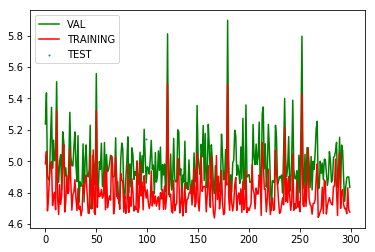

In [23]:
plt.plot(range(len(rmse_val_score)),rmse_val_score,c="G",label="VAL")
plt.plot(range(len(rmse_train_score)),rmse_train_score,c="r",label="TRAINING")
plt.scatter(99,rmse(y_test,sgd_regressor.predict(X_test)),s=1,label="TEST")
plt.legend()
plt.show()

In [24]:
np.argsort(rmse_val_score)

array([222,  45, 248, 181,  72,  33,  38, 294,  73,  78, 134,  70, 256,
       121,  77, 143, 145, 166, 107,  22, 233,  82, 250, 183, 171, 118,
       169, 240, 290, 124, 114, 262,  16, 140, 196, 268, 254, 138,  46,
        52, 212, 269, 260, 295, 299, 158, 211, 217, 287,  84,  57,  35,
        56, 122, 277,  49, 168,  21,  91, 142, 228, 195, 165, 191,  36,
        99, 203,  59,  94, 139, 225, 201,  13, 281, 109, 136, 128, 148,
        34,  31, 129,  71, 202, 172, 221, 170, 229, 224, 223, 156, 144,
       293, 241, 125,   3, 282, 175, 273, 147, 176,  87, 193, 246, 162,
       127, 245, 278, 231,  79, 296,   4, 198,  92, 298,  42,  66,  67,
       237, 297, 110, 230,  19,  68,  41,  51, 199,   2,  89, 188, 232,
       132, 116, 135, 182, 200, 152, 102, 159, 271, 178, 190, 276,  96,
        88,  61, 288, 247, 218, 112,  62,  43,  54, 264, 244,  48, 105,
       133, 215,   7, 101,  20, 151, 253, 100, 238,  26,  27, 167,  30,
       189, 106, 115, 206, 208, 117,  83,  63,  12, 272, 184, 25

In [26]:
rmse(y_test,sgd_regressor.predict(X_test))

5.142430228538233

In [27]:
rmse(y_test,model_list[217].predict(X_test))

5.03447425755523

In [28]:
model_list[0].coef_

array([-1.20891198,  0.76255126,  0.44839913,  1.72659068, -1.86250679,
        3.92885701, -0.10037196, -3.24998655,  1.73978811, -1.73424714,
       -2.32725993,  1.43138451, -3.89317596])

### Etc...
- RepeatedKFold : 중복이 포함된 K-Fold 생성
- LeavePOut : 한번에 P개를 뽑음 (Not LOO for one data)
- ShuffleSplit : 독립적인(중복되는) 데이터 Sampling
- StratfiedKFold : Y값 비율에 따라 뽑음
- GroupKFold : 그룹별로 데이터를 Sampling